In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import mutual_info_classif

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12,6)

In [26]:
data = pd.read_csv("Phishing_Legitimate_full.csv")

In [27]:
df.columns

Index(['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'], dtype='object')

In [28]:
df.shape

(31, 5)

In [40]:
df.isnull()

,num_of_features,precision,recall,f1_score,accuracy
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [30]:
data.sample(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
859,860,3,1,2,38,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,16,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1
1748,1749,1,0,2,52,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,15,30,0,0,0,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6898,6899,2,1,5,74,6,0,0,0,0,0,0,0,0,8,1,1,0,0,1,0,23,44,0,0,0,0,0.131579,1.000000,1,1,1,0,0,0.026316,0,0,0,0,1,0,0,1,1,0,-1,1,0,1,0
2071,2072,2,0,1,48,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,19,22,0,0,0,0,0.500000,1.000000,1,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,1,1,-1,1,-1,0,1
8890,8891,2,0,1,40,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,24,9,0,0,0,0,0.028571,0.114286,0,0,0,0,0,0.028571,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0


In [31]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,0.458600,0.277200,0.002300,5.810300,0.988800,0.52520,0.017200,0.022200,0.428900,0.0,18.82430,35.564900,8.606500,0.000900,0.109300,0.057100,0.241334,0.392932,0.167200,0.844000,0.248700,0.1018,0.057600,0.136136,0.215300,0.005500,0.014000,0.004900,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,1.344793,1.117356,0.047906,9.617877,0.105241,0.49939,0.130023,0.147341,0.494944,0.0,8.11654,24.588502,24.313053,0.029988,0.368737,0.232045,0.342370,0.387292,0.373173,0.362873,0.432281,0.3024,0.232997,0.312413,0.411051,0.073961,0.117496,0.069832,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,4.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0,14.00000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.0,18.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.247511,0.000000,1.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.0,22.00000,48.000000,0.000000,0.000000,0.000000,0.000000,0.315874,0.785714,0.000000,1.000000,0.000000,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,

In [32]:
data.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

<Axes: >

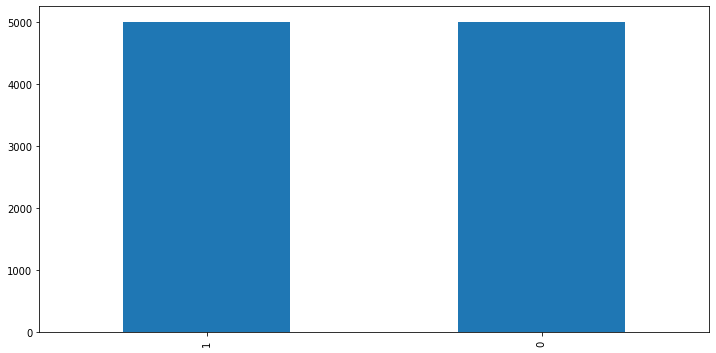

In [33]:
data['labels'].value_counts().plot(kind='bar')

In [34]:
X = data.drop(['id', 'labels'], axis=1)
y = data['labels']
discrete_features = X.dtypes == int

In [35]:
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.700238e-01
PctExtResourceUrls                    2.972087e-01
PctNullSelfRedirectHyperlinks         2.378686e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [36]:
def train_logistic(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [37]:
arr = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_logistic(data, i)
    print("Performance for Logistic Model with Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    arr.append([i, precision, recall, f1, accuracy])

Performance for Logistic Model with Top 20 features is precision : 0.9146341463414634, recall : 0.9345794392523364, f1 score : 0.9244992295839753, accuracy : 0.9265
Performance for Logistic Model with Top 21 features is precision : 0.9124877089478859, recall : 0.945010183299389, f1 score : 0.928464232116058, accuracy : 0.9285
Performance for Logistic Model with Top 22 features is precision : 0.9259624876604146, recall : 0.938938938938939, f1 score : 0.9324055666003975, accuracy : 0.932
Performance for Logistic Model with Top 23 features is precision : 0.913894324853229, recall : 0.9443882709807887, f1 score : 0.9288910989557434, accuracy : 0.9285
Performance for Logistic Model with Top 24 features is precision : 0.9255952380952381, recall : 0.9376884422110553, f1 score : 0.9316025961058412, accuracy : 0.9315
Performance for Logistic Model with Top 25 features is precision : 0.916583912611718, recall : 0.943762781186094, f1 score : 0.9299748110831234, accuracy : 0.9305
Performance for L

In [38]:
df = pd.DataFrame(arr, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.914634,0.934579,0.924499,0.9265
1,21,0.912488,0.945010,0.928464,0.9285
2,22,0.925962,0.938939,0.932406,0.9320
3,23,0.913894,0.944388,0.928891,0.9285
4,24,0.925595,0.937688,0.931603,0.9315
5,25,0.916584,0.943763,0.929975,0.9305
6,26,0.915480,0.960159,0.937287,0.9355
7,27,0.923819,0.938296,0.931001,0.9290
8,28,0.926641,0.949555,0.937958,0.9365
9,29,0.935385,0.934426,0.934905,0.9365


<Axes: xlabel='num_of_features', ylabel='precision'>

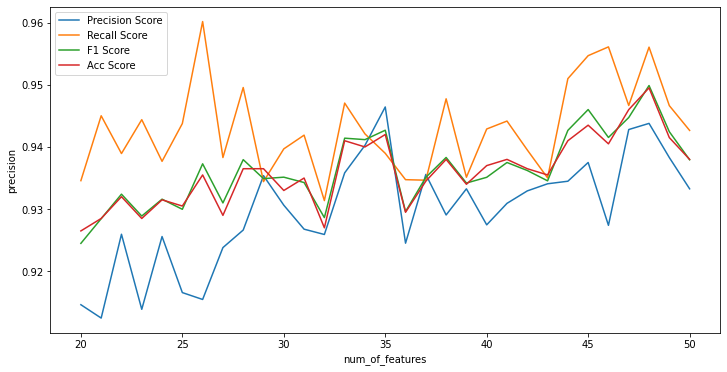

In [39]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')